In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [335]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()

In [336]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,431.000000,431.000000,4.310000e+02,431.000000,4.310000e+02,431.000000,4.310000e+02,4.310000e+02
mean,251.231918,-0.990422,-3.243791e-07,-0.000168,-6.174794e-08,-0.000023,1.821622e-07,-1.203596e-09
std,145.554702,0.001020,3.218941e-03,0.000709,2.143427e-03,0.006599,1.465726e-03,2.572569e-09
min,0.000000,-0.991665,-4.521033e-03,-0.001121,-3.245496e-03,-0.009033,-2.051039e-03,-8.203125e-09
25%,125.615950,-0.991453,-3.233898e-03,-0.000866,-1.974973e-03,-0.006495,-1.478378e-03,-2.734375e-09
50%,251.231900,-0.990584,1.036936e-05,-0.000219,7.287230e-06,-0.000404,-4.112429e-06,-1.171875e-09
75%,376.847850,-0.989406,3.221567e-03,0.000529,1.983785e-03,0.006394,1.476703e-03,7.812500e-10
max,502.463800,-0.988843,4.520971e-03,0.000898,3.245424e-03,0.009931,2.051266e-03,3.906250e-09


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

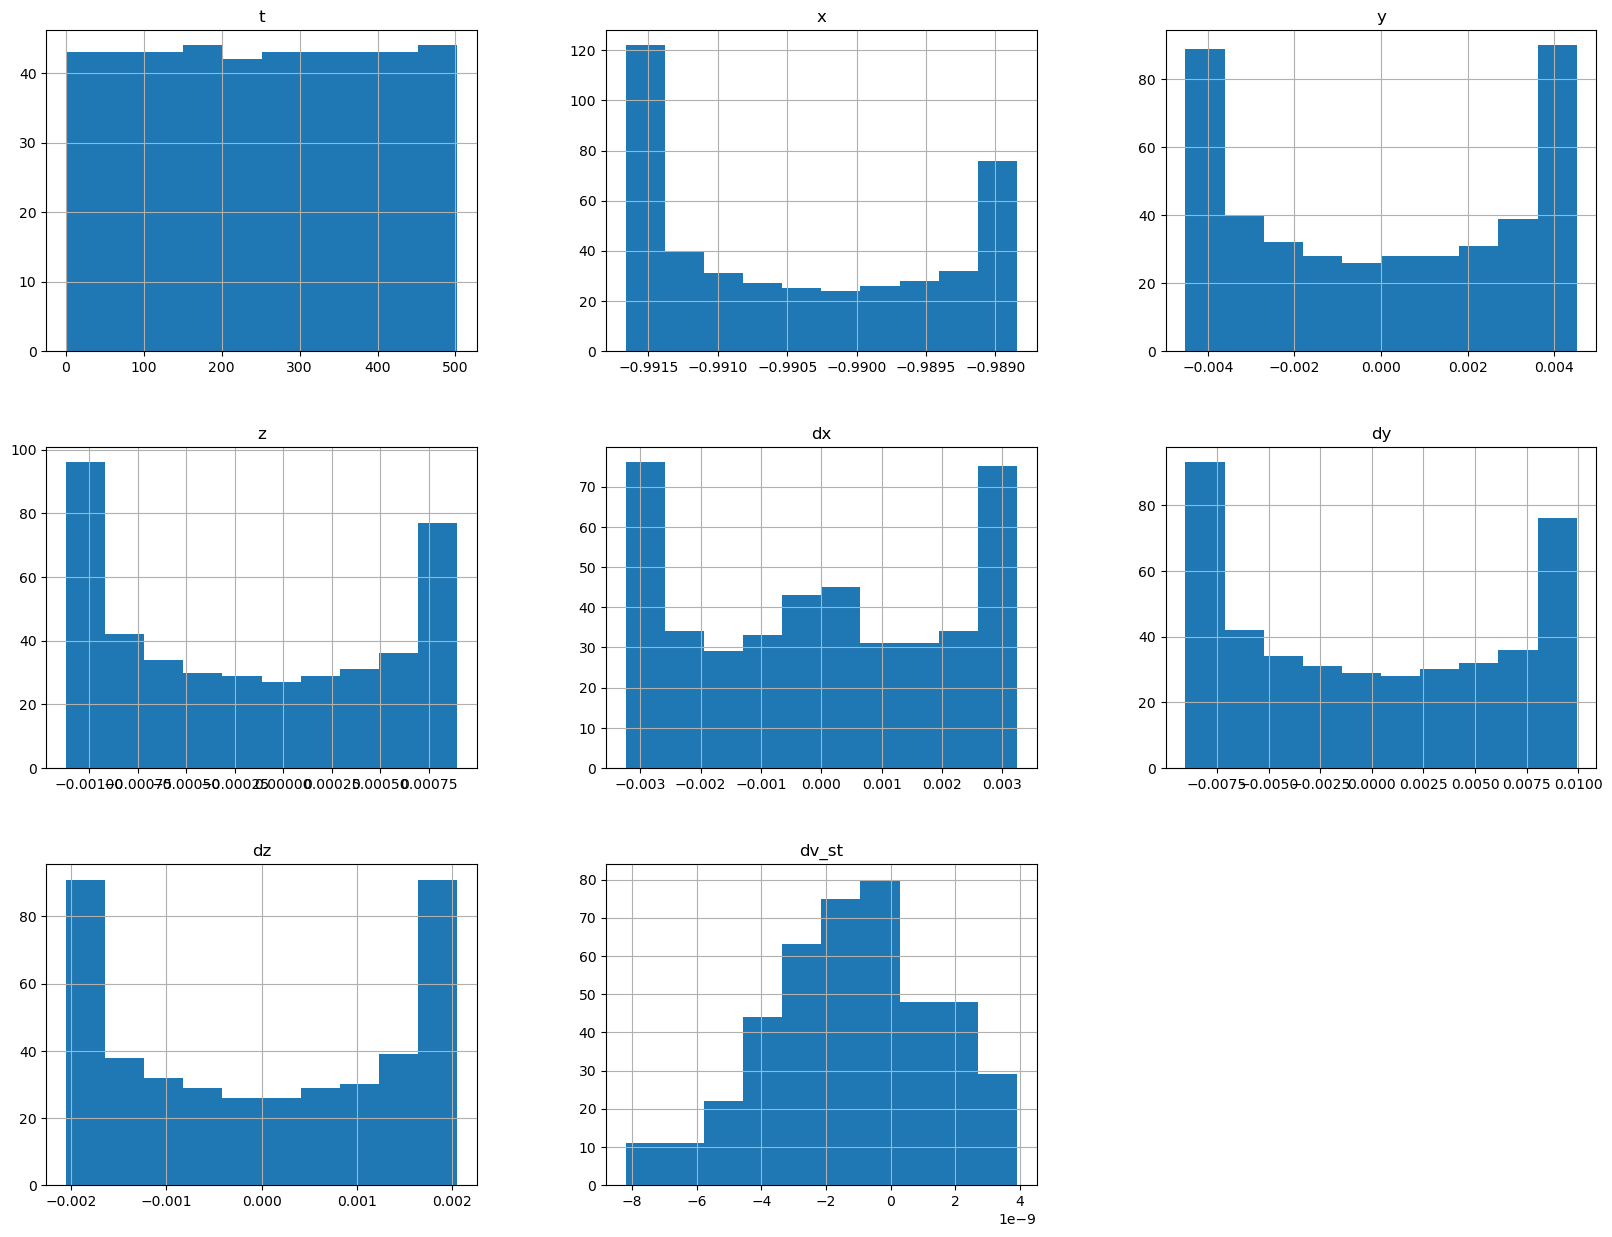

In [337]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Create a Train/Test Set

In [338]:
train_set, test_set = train_test_split(maneuvers, test_size=0.2, random_state=1)

## Visualizing Data

In [339]:
# Let's create a copy of the training set and call it 'maneuvers' again.
# This way we can play around with it without harming the training set.
maneuvers = train_set.copy()

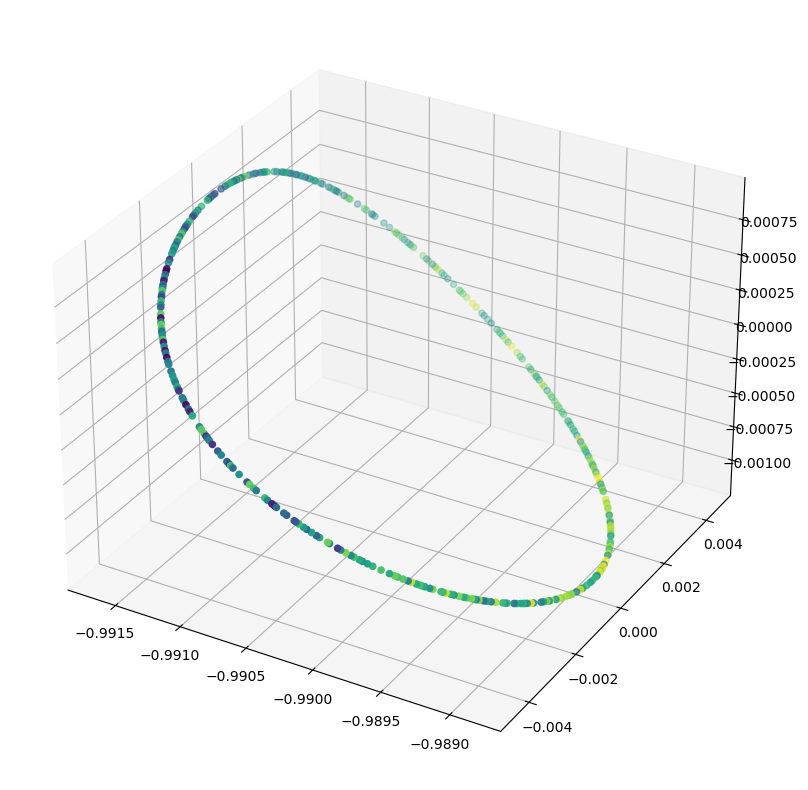

In [340]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [341]:
maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
x        0.473469
y        0.359673
dx       0.341845
angle   -0.077352
dz      -0.360108
z       -0.461955
dy      -0.462256
Name: dv_st, dtype: float64

array([[<Axes: xlabel='angle', ylabel='angle'>,
        <Axes: xlabel='x', ylabel='angle'>,
        <Axes: xlabel='dv_st', ylabel='angle'>],
       [<Axes: xlabel='angle', ylabel='x'>,
        <Axes: xlabel='x', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='angle', ylabel='dv_st'>,
        <Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', ylabel='dv_st'>]], dtype=object)

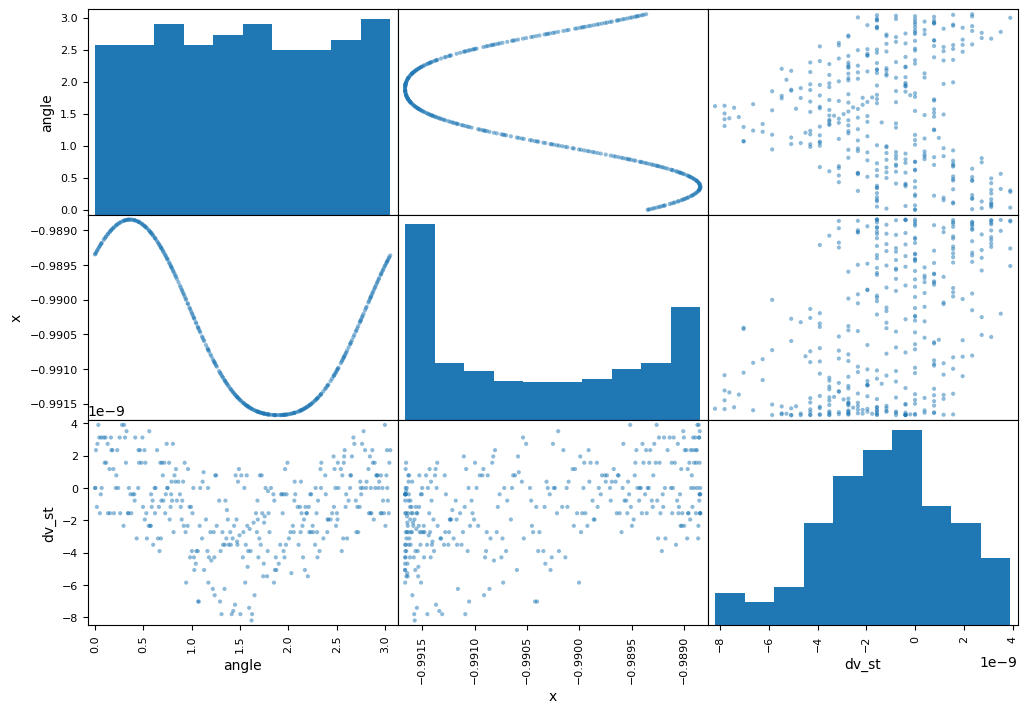

In [342]:
attributes = ["angle", "x", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

# Prepare the Data for Machine Learning Algorithms

In [343]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers["dv_st"].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz,angle
80,-0.991626,-0.001788,0.000805,-0.000461,0.009010,0.000977,1.704842
46,-0.991642,-0.001418,0.000840,-0.000337,0.009357,0.000782,1.745098
403,-0.989959,0.004098,-0.000587,0.003215,-0.003818,-0.001726,2.852129
85,-0.991337,-0.003787,0.000392,-0.001734,0.005140,0.001880,1.428999
331,-0.991111,-0.004250,0.000174,-0.002315,0.003161,0.002020,1.317748


# Select and Train a Model

## Training and Evaluating on the Training Set

In [344]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(maneuvers_predictors, maneuvers_labels)

LinearRegression()

In [345]:
#Let's try it out on 5 instances from the training set
some_data = maneuvers_predictors[:10]
some_labels = maneuvers_labels[:10]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [-2.79660669e-09 -2.64645789e-09  3.99957732e-10 -3.62268567e-09
 -3.55895855e-09  3.84960521e-10  1.14148516e-10 -2.91926381e-09
 -1.59806783e-09 -3.47736409e-09]
Labels: [7.8125e-10, -4.6875e-09, 0.0, -7.617187e-09, -2.734375e-09, 1.5625e-09, 1.953125e-09, -2.734375e-09, -7.8125e-10, -7.8125e-10]


In [346]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(maneuvers_predictors)
lin_mse = mean_squared_error(maneuvers_labels, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0439917152282807e-09

Clearly not a great score: the average dv_st value is 1.e-9, so a typical prediction error of 2.e-9 is not great.

In [347]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(maneuvers_predictors, maneuvers_labels)

maneuvers_predictions = tree_reg.predict(maneuvers_predictors)
tree_mse = mean_squared_error(maneuvers_labels, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.552077414303275e-09

In [348]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(maneuvers_predictors, maneuvers_labels)

maneuvers_predictions = forest_reg.predict(maneuvers_predictors)
forest_mse = mean_squared_error(maneuvers_labels, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.552079810819508e-09

## Polynomial Regression

In [349]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(maneuvers_predictors)
#print(maneuvers_predictors.head())
#print(maneuvers_pred_poly[0])

In [350]:
lin_reg = LinearRegression()
lin_reg.fit(maneuvers_pred_poly, maneuvers_labels)
maneuvers_predictions = lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(maneuvers_labels, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.5159048687580606e-09

## SVM Regression

In [352]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(maneuvers_predictors, maneuvers_labels)
maneuvers_predictions = svm_poly_reg.predict(maneuvers_predictors)
svm_mse = mean_squared_error(maneuvers_labels, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

2.7217331933895353e-09